# COMSM0093 - Introduction to Financial Technology
# CA3 - Empirical Data Analysis and Hypothesis Testing

Introduction to Financial Technology has continuous assessment (CA) worth 30% of the final unit mark. There are three continuous assessments – your total continuous assessment mark is the sum of your best two CA marks. For example, a student with marks: CA1: 10/15, CA2: 6/15, CA3: 9:15, receives a final continuous assessment mark of (10+9)/30.  

+ Release date: Monday 06/11/2023 (1pm via Blackboard)

+ Submission: Monday 20/11/2023 (1pm via Blackboard) 

CA3 is __individual__ assessment. You must work alone. Standard penalty for late submission - one minute late and you lose 10%.

We expect you to spend around 4 hours on this work.

You will work directly within this Jupyter Notebook. When you have completed your work, submit this Notebook.

The first part of this Notebook has code to generate some empirical data.

You will add your own code in the second part of the Notebook to analyse the empirical data. 

You should also add Markdown sections of text to explain what you are doing and why. Write this in the style of a report.

__MARKING GUIDE__: Marks are available for:

+ accuracy of approach and results; 
+ coding style and comments; 
+ quality and choice of visualisations (be concise - do not present redundant information);
+ technical description of what you are doing and why; 
+ interpretation of results.

### Motivation:

We want to know if ZIP traders outperform ZIC traders in BSE when markets are configured in the same way as Vernon Smith's original experiments.

### Hypothesis:

We first state a null hypothesis (h_0) and alternative hypothesis (h_a). Here, we consider mean profit generated by each trader to be the metric of  'performance'.

+ `h_0: mean_profit(ZIP) <= mean_profit(ZIC)`

+ `h_a: mean_profit(ZIP) > mean_profit(ZIC)`

### Instructions:

You should use BSE to explore this hypothesis. Generate empirical data, perform analysis and summarise your findings.

__Tip__: In the Hypothesis Testing Activity week, you explored methods of visualising and analysing data. You can follow similar methods. 

This is an individual assessment. You must work alone. We expect you to spend around 4 hours on this work.

This Jupyter notebook is in two parts. 
+ In the first part we give you code to generate empricial data. You should __not__ edit the first half of this notebook.

+ In the second part you will write your own code and markdown text to perform data analysis and hypothesis testing. 

When completed, submit the full file to Blackboard. We must be able to run your code.

__IMPORTANT INFORMATION__: 

This worksheet requires `BSE.py`

+ Download latest version BSE from GitHub here: https://github.com/davecliff/BristolStockExchange. ([Click to download latest ZIP archive](https://github.com/davecliff/BristolStockExchange/archive/refs/heads/master.zip))

+ Place file `BSE.py` in the __same folder__ as this Jupyter Notebook so that you can import BSE functions. Otherwise the code in this notebook will not work. Python will throw a `ModuleNotFoundError: No module named 'BSE'`

+ For full details on using BSE, refer to the [BSE wiki](https://github.com/davecliff/BristolStockExchange/wiki).

In [4]:
# Initial Setup:
# Import all the libraries we need

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pandas as pd

from BSE import market_session

### Configure a Vernon Smith Market

The following code contains a function to generate the data you need for CA3.

+ `run_Vernon(N=1, trader_type='ZIP', end_time=60*10)`

This function configures BSE to run a Vernon Smith experiment. Do not edit this code.

We can use this function to run N trials Vernon Smith experiments, configured as homogeneous markets with symmetric supply and demand.

Mean profits for each run are output to a different file. Note that this will create lots of files in your current directory.

In [2]:
'''Run a Vernon Smith experiment, configured in the same way as BSE walkthrough activty.

N = number of repeated trials. Default = 1
trader_type = populate market with this type of trading agent. Default = 'ZIP'
end_time = length of simulation. Default = 10 minutes
'''
def run_Vernon(N=1, trader_type='ZIP', end_time=60*10):
    # 10 minutes per simulation
    start_time = 0
    end_time = 60 * 10

    # Symmetric supply and demand. Price range 80 to 320. 
    # Successive price steps between traders fixed.
    chart1_range=(80, 320)

    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]

    # Periodic updating at the start of each 'day'. Let's say each 'day' is 60 seconds.
    order_interval = 60
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                'interval': order_interval, 'timemode': 'periodic'}

    # Let's use 11 traders on each side of type trader_type
    sellers_spec = [(trader_type, 11)]
    buyers_spec = sellers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

    # Configure output file settings. This is new for BSE version 28/10/2023.
    # For each data file type, set True to write file data, false to not write file.
    # In this case, we are only interested in average profits per trader. We set all other flags to False.
    dump_flags = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
              'dump_avgbals': True, 'dump_tape': False}

    # Let us run N sessions/trials of this experiment configuration

    for i in range(N):
        trial_id = trader_type+'_'+str(i)
        verbose = False # Reduce output of BSE (setting True gives lots of output that we do not need)

        # New settings: BSE version 28/10/2023
        market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, verbose)

### Generate empirical data for analysis

To explore the hypothesis, you first need to generate empirical data.

The code below will run 15 trials of each configuration. BSE will output files for each run. 

Each trial, the mean profit per trader will be output to a csv file named `<TRADER_TYPE>_<TRIAL_NUMBER>_avg_balance.csv`. 

Mean profit per trader is presented in last column. There are 8 column in total. The last column has index=7.

For a full description of BSE output files, see: https://github.com/davecliff/BristolStockExchange/wiki/6.-BSE-output-files

Run the code below (without editing) to generate your empirical results. 

In [9]:
# Let's compare markets containing only ZIP with markets containing only ZIC traders
trader1 = 'ZIP'
trader2 = 'ZIC'
# Let's run 15 trials. 
N = 15

# First configuration: run markets containing only ZIP. Repeat for N trials
run_Vernon(N,trader1)

# Second configuration: run with markets containing only ZIC. Repeat for N trials
run_Vernon(N,trader2)

### What to do next?

You have now generated 30 output files, containing results from your empirical experiments. 

You should write code to analyse these data files, address the hypothesis that ZIP outperforms ZIC, and report on your findings. 

+ Your notebook should contain all your working code. We must be able to run your notebook.

+ Your notebook should contain markdown to describe what you are doing and why and should include an interpretation of your results. 

+ You should only include what is necessary. Clear, correct, concise code and descriptions will get more marks than long, unncessary work.

When complete, submit this full notebook as a single file.

__Tip:__ Getting started: you have 30 files containing mean profits. You should first combine these profits into a single dataframe to work from.

# `--- ONLY MAKE EDITS BELOW THIS POINT ---`

Name: Debodip Chowdhury

First, we read the data from all the 30 files and combine them into a single file. 

In [5]:
import glob

columns = ["session_id", "time", "best_bid", "best_offer", "type_id", "total_profit", "num_traders", "mean_profit"]
single_dataframe = []

files = glob.glob('*.csv')
#reading all files
for file in files:
    df = pd.read_csv(file, index_col=False, header = None, names = columns, skipinitialspace = True)
    #print(df.head(5))
    single_dataframe.append(df)
#merging into one dataframe
single_dataframe = pd.concat(single_dataframe, ignore_index = True)

In [6]:
single_dataframe.head(20)

,session_id,time,best_bid,best_offer,type_id,total_profit,num_traders,mean_profit
0,ZIC_0,60,79,None,ZIC,120,22,5.454545
1,ZIC_0,60,75,259,ZIC,264,22,12.000000
2,ZIC_0,61,165,224,ZIC,456,22,20.727273
3,ZIC_0,63,199,254,ZIC,624,22,28.363636
4,ZIC_0,69,168,256,ZIC,720,22,32.727273
5,ZIC_0,121,158,292,ZIC,912,22,41.454545
6,ZIC_0,123,116,252,ZIC,1080,22,49.090909
7,ZIC_0,124,169,252,ZIC,1224,22,55.636364
8,ZIC_0,125,171,272,ZIC,1296,22,58.909091
9,ZIC_0,130,130,287,ZIC,1416,22,64.363636


We extract the mean profit per trader at the end of each market session.

In [7]:
#indices with max session time of 600
indice_session_id = single_dataframe.groupby('session_id')['time'].idxmax()
df = single_dataframe.loc[indice_session_id]
df = df.reset_index()
print(df)

    index session_id  time best_bid best_offer type_id  total_profit  \
0      48      ZIC_0   600       89        311     ZIC          6168   
1     360      ZIC_1   600       61        304     ZIC          6216   
2     101     ZIC_10   600      126        259     ZIC          6264   
3     155     ZIC_11   600      136        282     ZIC          6144   
4     206     ZIC_12   600      105        259     ZIC          6120   
5     256     ZIC_13   600      191        245     ZIC          6168   
6     307     ZIC_14   600      125        307     ZIC          6312   
7     414      ZIC_2   600       73        283     ZIC          6024   
8     466      ZIC_3   600      184        289     ZIC          6096   
9     518      ZIC_4   600      122        234     ZIC          6024   
10    567      ZIC_5   600      200        289     ZIC          6288   
11    621      ZIC_6   600      101        372     ZIC          6120   
12    676      ZIC_7   600      120        279     ZIC          

We structure the data so as to make it suitable for A/B hypothesis testing.

In [8]:
#extracting the relevant data and making a dataframe containing it
mean_profit_ZIC = pd.DataFrame()
mean_profit_ZIP = pd.DataFrame()
mean_profit_ZIC['ZIC_mean_profit']= df[df['type_id']=='ZIC']['mean_profit']
mean_profit_ZIP['ZIP_mean_profit']= df[df['type_id']=='ZIP']['mean_profit']
mean_profit_ZIP=mean_profit_ZIP.reset_index(drop=True)
mean_profit_data = pd.concat([mean_profit_ZIC, mean_profit_ZIP], axis = 1)
print(mean_profit_data)


    ZIC_mean_profit  ZIP_mean_profit
0        280.363636       149.454545
1        282.545455       186.545455
2        284.727273       169.090909
3        279.272727        88.363636
4        278.181818       165.818182
5        280.363636       135.272727
6        286.909091       194.181818
7        273.818182       184.363636
8        277.090909       160.363636
9        273.818182       187.636364
10       285.818182       211.636364
11       278.181818       111.272727
12       277.090909       127.636364
13       286.909091       130.909091
14       278.181818       147.272727


We summarise the data by finding the mean, standard deviation and number of instances in the mean profit data for each of the two columns.

In [9]:
for col in mean_profit_data.columns:
    print("mean of {0}  is :{1} " .format(col, mean_profit_data[col].mean()) + "number of instances are:{:}".format(mean_profit_data[col].count()))
    print("std of {0}  is :{1} " .format(col, mean_profit_data[col].std()) + "number of instances are:{:}".format(mean_profit_data[col].count()))

mean of ZIC_mean_profit  is :280.21818179999997 number of instances are:15
std of ZIC_mean_profit  is :4.32187818380566 number of instances are:15
mean of ZIP_mean_profit  is :156.65454540000002 number of instances are:15
std of ZIP_mean_profit  is :33.94312917898692 number of instances are:15


We have equal sample size of 15. According to the data, ZIC has a higher average value of mean profit per trader compared with ZIP. But besides the mean we also need to look at the standard deviation values. The standard deviation around the mean is smaller than the differences in the mean, this means ZIC has a higher value compared to ZIP. We draw a boxplot below to provide a visual comparison of the data.

<AxesSubplot:>

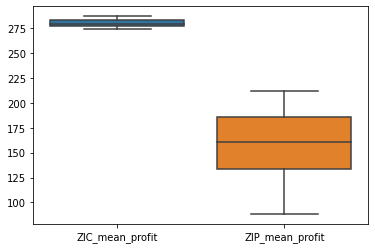

In [10]:
# comparing data visually
import seaborn as sns
sns.boxplot(data = mean_profit_data)

The diagram above shows us that ZIC has a higher mean profit than ZIP. We do a statistical testing inorder to be more accurate by finding out if the differences between the two populations is statistically significant or not. But before doing hypothesis testing, we must first determine whether the data is approximately normally distributed. We use Shapiro-wilk test, which is a specific and powerful test for normality.


In [11]:
# determining if the data is normally statistically distributed
from scipy import stats
statistic, pvalue = stats.shapiro(mean_profit_data['ZIC_mean_profit'])
if pvalue < 0.05:
    print("pvalue is {0} so data of ZIC is not normally distributed".format(pvalue))
    
else:
    print("pvalue is {0} so data of ZIC is normally distributed".format(pvalue))
    
statistic, pvalue = stats.shapiro(mean_profit_data['ZIP_mean_profit'])
if pvalue < 0.05:
    print("pvalue is {0} so data of ZIP is not normally distributed".format(pvalue))
    
else:
    print("pvalue is {0} so data of ZIP is normally distributed".format(pvalue))

pvalue is 0.23578689992427826 so data of ZIC is normally distributed
pvalue is 0.9535437226295471 so data of ZIP is normally distributed


As p-value>0.05, we cannot reject the null hypothes is that data is drawn from an approximately normal distribution. Next, we try to visualise the normality of data.

<AxesSubplot:ylabel='Density'>

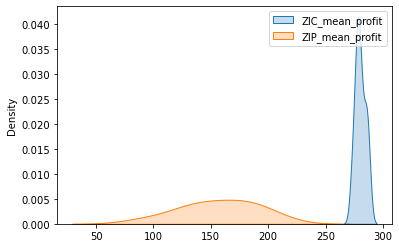

In [12]:
import seaborn as sns
sns.kdeplot(data=mean_profit_data, fill=True)

Here, we can see that both the data is Unimodal, roughly symmetric and tails not too heavy. They re roughly bell shaped.

Our sample size is not large enough for the centrl limit theorem to apply. We have determined our data is approximately normally distributed. Therefore, we use a parametric test such as a t-test or ANOVA. We are comparing two distributions so we use a t-test.


In [13]:
#hypothesis testing
stats.ttest_ind(mean_profit_data['ZIC_mean_profit'], mean_profit_data['ZIP_mean_profit'], equal_var=False)

Ttest_indResult(statistic=13.985958539435215, pvalue=8.466460623637195e-10)


As p-value<0.05, we reject the null hypothesis that the two distributions have the same population means. The statistic value suggests that the difference is significant.


So according to the analysis there is a significant difference in the mean of the two populations. According to the summary and box plots we did previously, we have seen that mean_profit of ZIC is greater than  mean profit of ZIP. So, according to the data and information we have, we accept the null hypothesis that mean_profit(ZIP) <= mean_profit(ZIC).


### `--- DO NOT EDIT BELOW THIS POINT ---`

The following code will print the current word count of the markdown in this notebook. You need to make sure that the variable `this_file_name` is the same as the current file name.

In [14]:
# Do not edit this code. It will print the word count of your notebook.
import io
from nbformat import current

def printWordCount(filepath):

    with io.open(filepath, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')

    word_count = 0
    for cell in nb.worksheets[0].cells:
        if cell.cell_type == "markdown":
            word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    print("Word count: " + str(word_count) + ". Limit is 2000 words.")

# This should be the final output of your notebook.
# Edit filename to be the same as this filename and then run.
# Save your file before running this code.

this_file_name = "CA3.INFT.Data.Analysis.23 (2).ipynb" # Enter name of this file here
printWordCount(this_file_name)

Word count: 1194. Limit is 2000 words.
